In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [30]:
train = pd.read_csv('data/train_clean.csv')
test = pd.read_csv('data/test_clean.csv')

In [31]:
train.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Outlet_Age
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Small,Supermarket Type1,20
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,10
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Small,Supermarket Type1,20
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,Small,Grocery Store,21
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,Small,Supermarket Type1,32


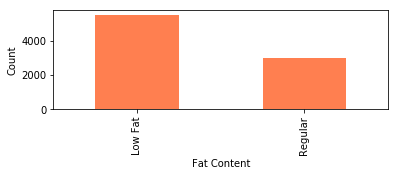

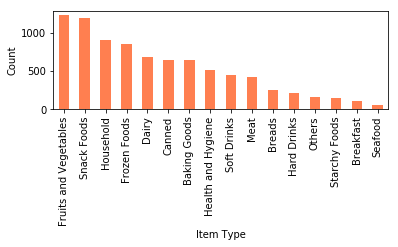

In [110]:
plt.subplot(2,1,1)
fat_content = train['Item_Fat_Content'].value_counts()
fat_content.plot(kind = 'bar', facecolor = 'coral')
plt.xlabel('Fat Content')
plt.ylabel('Count')
plt.show()

plt.subplot(2,1,2)
item_type = train['Item_Type'].value_counts()
item_type.plot(kind = 'bar', facecolor = 'coral')
plt.xlabel('Item Type')
plt.ylabel('Count')
plt.show()

 

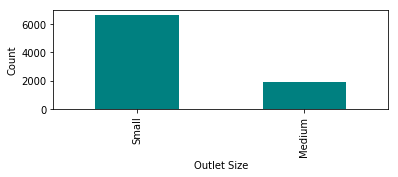

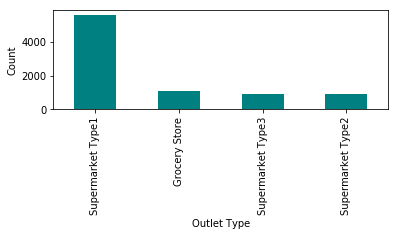

In [106]:
plt.subplot(2,1,1)
outlet_size = train['Outlet_Size'].value_counts()
outlet_size.plot(kind = 'bar', facecolor = 'teal')
plt.xlabel('Outlet Size')
plt.ylabel('Count')
plt.show()

plt.subplot(2,1,2)
outlet_type = train['Outlet_Type'].value_counts()
outlet_type.plot(kind = 'bar', facecolor = 'teal')
plt.xlabel('Outlet Type')
plt.ylabel('Count')
plt.show()


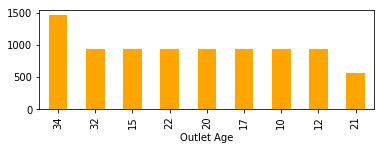

In [108]:
plt.subplot(2,1,2)
outlet_age = train['Outlet_Age'].value_counts()
outlet_age.plot(kind = 'bar', facecolor = 'orange')
plt.xlabel('Outlet Age')
plt.show()

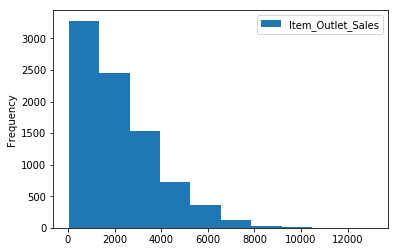

In [46]:
train[['Item_Outlet_Sales']].plot(kind = 'hist', bins = 10)
plt.show()

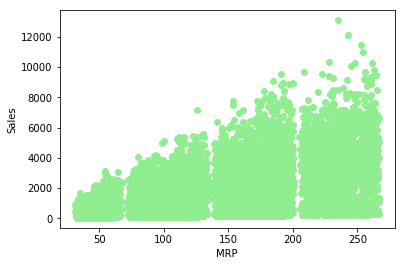

In [67]:
plt.scatter(train['Item_MRP'], train['Item_Outlet_Sales'], s=None, facecolors = 'lightgreen' )
plt.xlabel('MRP')
plt.ylabel('Sales')
plt.show()

In [ ]:
# Price can be categorized into 4 bins

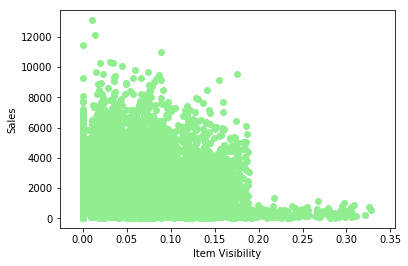

In [70]:
plt.scatter(train['Item_Visibility'], train['Item_Outlet_Sales'], s=None, facecolors = 'lightgreen' )
plt.xlabel('Item Visibility')
plt.ylabel('Sales')
plt.show()

In [ ]:
# right skewed, there are some outliers

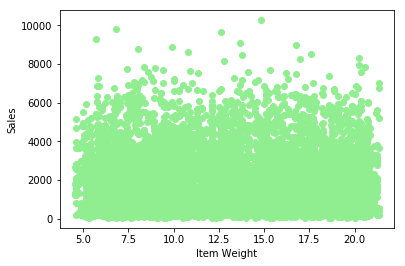

In [72]:
plt.scatter(train['Item_Weight'], train['Item_Outlet_Sales'], s=None, facecolors = 'lightgreen' )
plt.xlabel('Item Weight')
plt.ylabel('Sales')
plt.show()

In [ ]:
# some outliers here